In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgbm
from sklearn.metrics import confusion_matrix, accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler

#데이터분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV

#모델링
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

!pip install bayesian-optimization
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git
from lightgbm import LGBMClassifier as lgb
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#성과 평가 지표
from sklearn.metrics import accuracy_score, mean_squared_error

  Cloning https://github.com/scikit-optimize/scikit-optimize.git to c:\users\김서윤\appdata\local\temp\pip-req-build-8o6y6lgz


  Running command git clone -q https://github.com/scikit-optimize/scikit-optimize.git 'C:\Users\김서윤\AppData\Local\Temp\pip-req-build-8o6y6lgz'
  ERROR: Error [WinError 2] 지정된 파일을 찾을 수 없습니다 while executing command git clone -q https://github.com/scikit-optimize/scikit-optimize.git 'C:\Users\김서윤\AppData\Local\Temp\pip-req-build-8o6y6lgz'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


### 데이터셋 준비

In [123]:
train = pd.read_csv('C:/Users/김서윤/Documents/2020 2학기 강의/응용머신러닝(주영준)/기말 프로젝트/data/train.csv', index_col=0)
test = pd.read_csv('C:/Users/김서윤/Documents/2020 2학기 강의/응용머신러닝(주영준)/기말 프로젝트/data/test_x.csv', index_col=0)
submission=pd.read_csv('C:/Users/김서윤/Documents/2020 2학기 강의/응용머신러닝(주영준)/기말 프로젝트/data/sample_submission.csv', index_col=0)  

In [96]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,...,1,1,0,1,1,1,1,0,1,1
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,...,1,1,0,1,1,1,1,0,1,1
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,...,1,1,0,1,1,0,1,0,1,1


In [82]:
test

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,...,0,1,0,0,1,0,1,0,1,1
1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,...,0,0,0,0,0,0,0,0,0,0
2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,...,0,1,0,1,1,0,1,0,1,1
3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,...,1,1,1,1,1,1,1,1,1,1
4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,...,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,...,1,1,0,1,1,0,1,0,1,1
11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,...,1,1,1,1,1,1,1,1,1,1
11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,...,1,1,0,1,1,0,1,0,1,1


In [97]:
train[['age_group','gender', 'race', 'religion']]

,age_group,gender,race,religion
index,,,,
0,30s,Female,White,Other
1,20s,Female,Asian,Hindu
2,30s,Male,White,Other
3,20s,Female,Asian,Hindu
4,20s,Male,White,Agnostic
...,...,...,...,...
45527,10s,Female,White,Jewish
45528,30s,Male,White,Atheist
45529,10s,Female,White,Christian_Other


In [124]:
train_x = train.drop('voted', axis = 1)
train_y = train['voted']

### EDA

In [30]:
eda_train = train.copy()
voted = eda_train[eda_train['voted']==1]
unvoted = eda_train[eda_train['voted']==2]

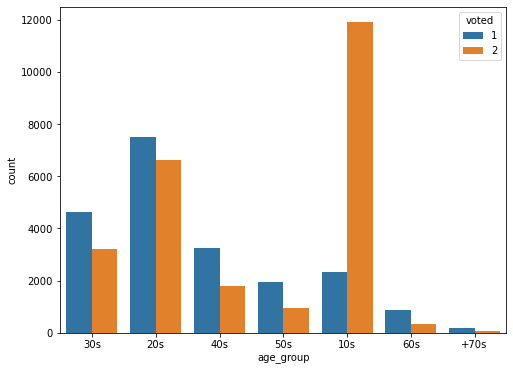

In [31]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'age_group', hue = eda_train['voted'])

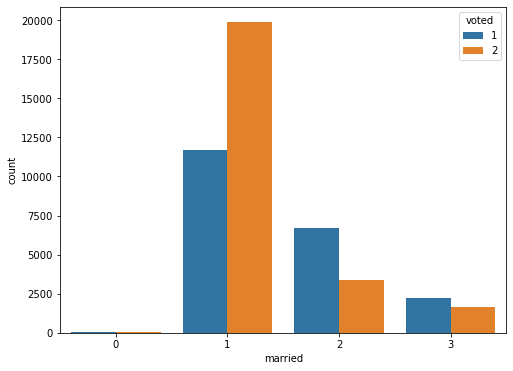

In [32]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'married', hue = eda_train['voted'])

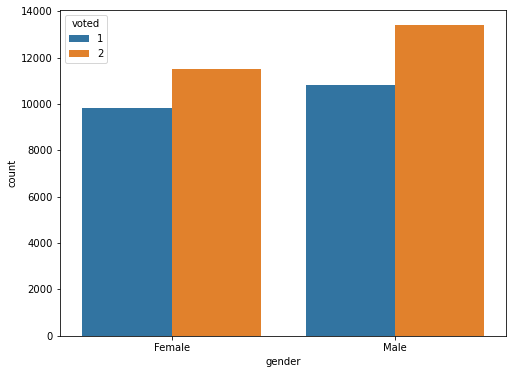

In [33]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'gender', hue = eda_train['voted'])

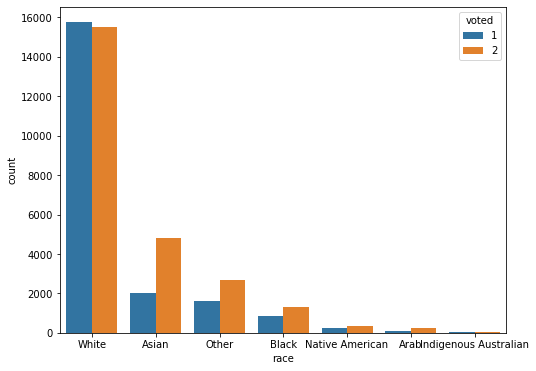

In [34]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'race', hue = eda_train['voted']

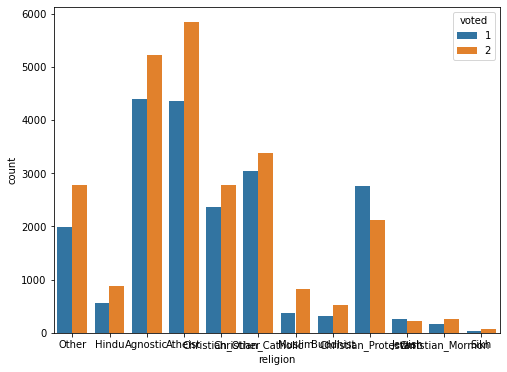

In [35]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'religion', hue = eda_train['voted'])

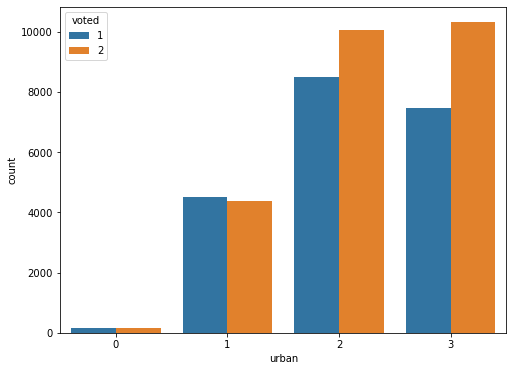

In [36]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'urban', hue = eda_train['voted'])

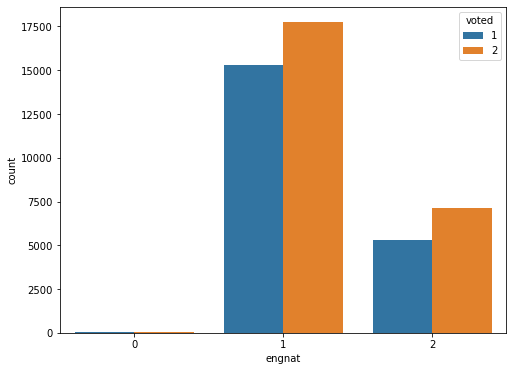

In [37]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'engnat', hue = eda_train['voted'])

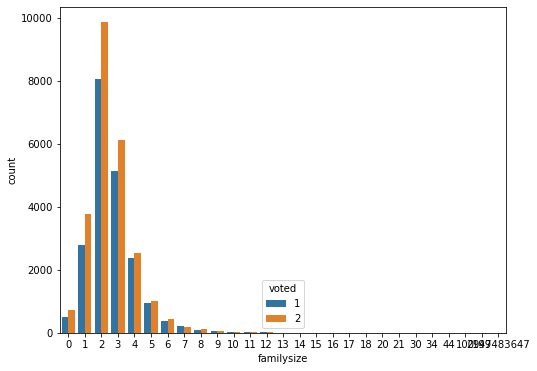

In [38]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'familysize', hue = eda_train['voted'])

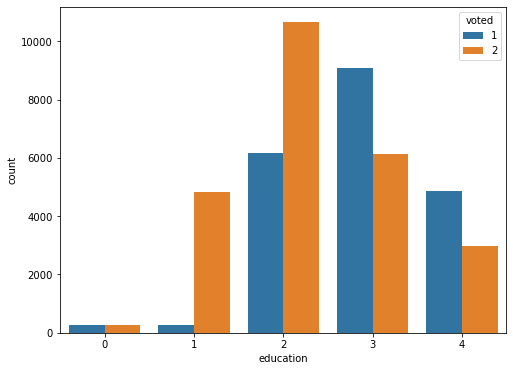

In [39]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'education', hue = eda_train['voted'])

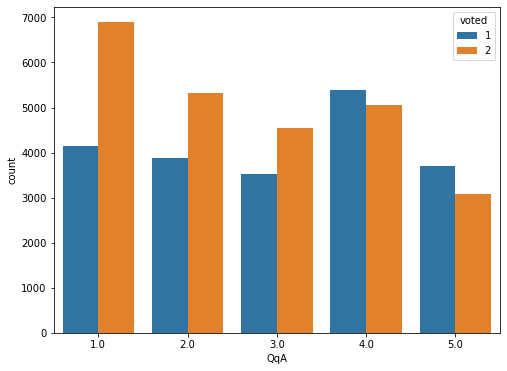

In [40]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'QqA', hue = eda_train['voted'])

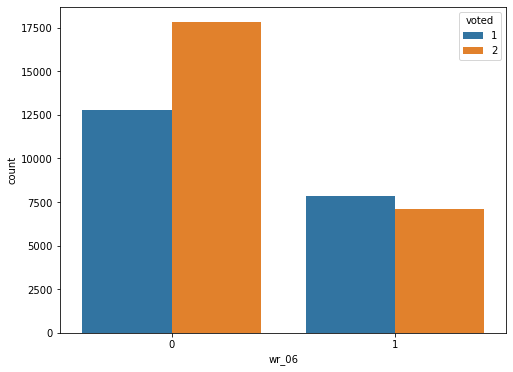

In [42]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'wr_06', hue = eda_train['voted'])

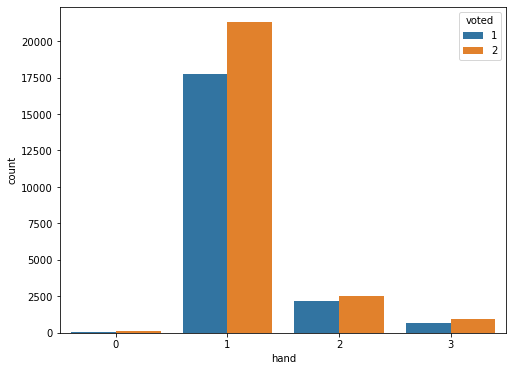

In [43]:
plt.figure(figsize = (8,6))
sns.countplot(data = eda_train, x = 'hand', hue = eda_train['voted'])

### one-hot encoding

In [125]:
train_x = pd.get_dummies(train_x) #,columns=['age_group','gender', 'race', 'religion'] #CAT은 제외
test = pd.get_dummies(test)

In [128]:
train_x[['gender_Female', 'gender_Male', 'age_group_10s', 'age_group_20s']]

,gender_Female,gender_Male,age_group_10s,age_group_20s
index,,,,
0,1,0,0,0
1,1,0,0,1
2,0,1,0,0
3,1,0,0,1
4,0,1,0,1
...,...,...,...,...
45527,1,0,1,0
45528,0,1,0,0
45529,1,0,1,0


### label encoding

In [119]:
def familysize_label(df):
    if df < 4: return 1
    elif df < 8: return 2
    elif df < 16: return 3
    elif df < 32: return 4
    else: return 0

train_x['familysize_label'] = train['familysize'].apply(lambda x:familysize_label(x))
test['familysize_label'] = test['familysize'].apply(lambda x:familysize_label(x))

In [108]:
test['familysize_label']

index
0        1
1        1
2        2
3        2
4        1
        ..
11378    1
11379    1
11380    2
11381    1
11382    1
Name: familysize_label, Length: 11383, dtype: int64

In [65]:
def age_group_label(df):
    if df == '10s': return 1
    elif df == '20s': return 2
    elif df =='30s': return 3
    elif df == '40s': return 4
    elif df == '50s': return 5
    elif df == '60s': return 6
    elif df == '+70s': return 7
    else: return 0

train_x['age_group_label'] = train['age_group'].apply(lambda x:age_group_label(x))
test['age_group_label'] = test['age_group'].apply(lambda x:age_group_label(x))

In [66]:
train_x['age_group_label'][0:100]

index
0     3
1     2
2     3
3     2
4     2
     ..
95    2
96    3
97    2
98    3
99    1
Name: age_group_label, Length: 100, dtype: int64

In [67]:
train_x

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,familysize_label,age_group_label
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,1,0,1,0,1,1,2,3
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,0,1,1,0,1,0,1,1,1,2
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,0,1,1,1,1,0,1,1,1,3
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,1,0,1,0,1,1,1,2
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,0,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,...,0,1,1,1,1,0,1,1,1,1
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,...,0,1,1,1,1,0,1,1,1,3
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,...,0,1,1,0,1,0,1,1,1,1


In [136]:
train_x.iloc[:,20:30]

,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE
index,,,,,,,,,,
0,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579
1,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214
2,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304
3,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169
4,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754
...,...,...,...,...,...,...,...,...,...,...
45527,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915
45528,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524
45529,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298


### scaling

In [137]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#columns=['age_group','gender', 'race', 'religion']
train_x.iloc[:,:] = scaler.fit_transform(train_x.iloc[:,:])
test.iloc[:,:] = scaler.fit_transform(test.iloc[:,:])

In [138]:
train_x.iloc[:,20:30]

,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE
index,,,,,,,,,,
0,0.135564,-0.037665,-0.283987,-0.007888,-1.09781,-0.015925,1.606989,-0.024512,-0.824461,-0.078965
1,0.864143,0.029455,-0.283987,0.000508,-1.82502,0.030259,1.606989,0.147893,-1.501785,-0.020439
2,0.864143,-0.033918,0.587869,-0.003259,-1.09781,-0.015036,0.928105,0.203261,-0.824461,-0.012144
3,-0.593014,0.038448,-0.283987,-0.006674,0.35661,0.092896,0.928105,0.043633,0.530188,-0.024587
4,0.864143,-0.042324,0.587869,-0.006988,0.35661,-0.019962,-0.429663,-0.065568,-1.501785,-0.062836
...,...,...,...,...,...,...,...,...,...,...
45527,0.135564,-0.046527,0.587869,-0.009624,0.35661,-0.022073,-1.108547,-0.112588,-0.824461,0.044170
45528,-1.321593,0.014304,0.587869,-0.006750,-0.37060,-0.016032,-0.429663,0.075149,0.530188,0.008133
45529,0.864143,-0.031833,0.587869,-0.006147,-1.82502,-0.001889,0.928105,-0.011735,-1.501785,-0.012697


In [ ]:
#normalize
from sklearn.preprocessing import normalize
train_x1 = train_x.copy()
train_x1[['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE']] = normalize(train_x1[['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE']], norm='l2')
test1 = test.copy()
test1[['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE']] = normalize(test1[['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE']], norm='l2')

In [103]:
train_x

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh
index,,,,,,,,,,,,,,,,,,,,,
26864,0.728970,0.404441,0.699257,-0.051709,-0.464748,-0.111118,0.238390,-0.067744,-0.232073,-0.048895,...,-0.137194,-0.406142,-0.098381,-0.358748,-0.346848,-0.181251,-0.10373,-0.163695,-0.341400,-0.051152
1669,-0.107976,-0.079944,1.338627,0.101729,-0.464748,-0.154976,0.238390,0.019862,0.498442,-0.058605,...,-0.137194,-0.406142,-0.098381,-0.358748,-0.346848,-0.181251,-0.10373,-0.163695,2.929113,-0.051152
9161,-0.944921,-0.103648,-1.218855,-0.055197,0.234497,-0.101320,-0.718284,-0.082917,-0.232073,-0.004776,...,-0.137194,-0.406142,-0.098381,-0.358748,2.883109,-0.181251,-0.10373,-0.163695,-0.341400,-0.051152
11312,-0.944921,-0.062069,1.338627,0.084602,0.933742,-0.065861,-0.718284,-0.025570,-0.962587,-0.044067,...,-0.137194,-0.406142,-0.098381,-0.358748,-0.346848,-0.181251,-0.10373,-0.163695,2.929113,-0.051152
25324,-0.107976,-0.068675,1.338627,-0.039879,0.234497,0.041101,0.238390,-0.042114,-0.232073,-0.031662,...,-0.137194,-0.406142,-0.098381,-0.358748,-0.346848,-0.181251,-0.10373,-0.163695,2.929113,-0.051152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,0.728970,0.053927,1.338627,0.043947,0.933742,-0.052680,-0.718284,-0.005854,-0.232073,-0.060402,...,-0.137194,-0.406142,-0.098381,-0.358748,-0.346848,-0.181251,-0.10373,-0.163695,-0.341400,-0.051152
15377,0.728970,-0.087327,-1.218855,-0.063760,-1.863237,-0.120216,-0.718284,-0.069030,-0.962587,-0.037725,...,-0.137194,-0.406142,-0.098381,-0.358748,-0.346848,-0.181251,-0.10373,-0.163695,-0.341400,-0.051152
17730,-0.107976,-0.068286,-1.218855,0.138456,-1.863237,-0.053030,0.238390,0.019690,0.498442,-0.007751,...,-0.137194,2.462196,-0.098381,-0.358748,-0.346848,-0.181251,-0.10373,-0.163695,-0.341400,-0.051152


### predict

In [75]:
#LGBM
model = lgbm.LGBMClassifier(n_estimators=500)
model.fit(train_x1, train_y)

LGBMClassifier(n_estimators=500)

In [ ]:
##----------------grid 범위 설정----------------##

gridParams = {
    'learning_rate': [0.001, 0.01],
    'n_estimators': [300,400,500],
    'num_leaves': [700,800,900,1000], # large num_leaves helps improve accuracy but might lead to over-fitting
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
     }


grid = GridSearchCV(mdl, gridParams, verbose=1, cv=5, n_jobs=-1)

# Run the grid

grid.fit(nonanswer_x_d, nonanswer_y)

# Print the best parameters found

print(grid.best_params_)
print(grid.best_score_)

In [11]:
#LGBM + gridsearch best params
param_grid={
    'max_depth':[5],#5
    'learning_rate':[0.1],#0.1
    'gamma':[0],#0
    'reg_lambda':[20],#20
    'scale_pos_weight':[1]}#1

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.15, train_size = 0.85, random_state = 123)
      
# lgb()
model =lgb(**param_grid,random_seed = 123)

# 모델 학습
model.fit(train_x, train_y, eval_set=(val_x, val_y))

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's binary_logloss: 0.668817
[2]	valid_0's binary_logloss: 0.652448
[3]	valid_0's binary_logloss: 0.638829
[4]	valid_0's binary_logloss: 0.627509
[5]	valid_0's binary_logloss: 0.617716
[6]	valid_0's binary_logloss: 0.609503
[7]	valid_0's binary_logloss: 0.602546
[8]	valid_0's binary_logloss: 0.596588
[9]	valid_0's binary_logloss: 0.591495
[10]	valid_0's binary_logloss: 0.587234
[11]	valid_0's binary_logloss: 0.583419
[12]	valid_0's binary_logloss: 0.580168
[13]	valid_0's binary_logloss: 0.577424
[14]	valid_0's binary_logloss: 0.574759
[15]	valid_0's binary_logloss: 0.572661
[16]	valid_0's binary_logloss: 0.570758
[17]	valid_0's binary_logloss: 0.569264
[18]	valid_0's binary_logloss: 0.568072
[19]	valid_0's binary_logloss: 0.566845
[20]	valid_0's binary_logloss: 0.565745
[21]	valid_0's binary_logloss: 0.

LGBMClassifier(gamma=[0], learning_rate=[0.1], max_depth=[5], random_seed=123,
               reg_lambda=[20], scale_pos_weight=[1])

In [110]:
# standard scaler 적용
#scaler = StandardScaler()
#train_x = scaler.fit_transform(train_x)
#test = scaler.fit_transform(test)

param_grid={
    'max_depth':[5],#5
    'learning_rate':[0.1],#0.1
    'gamma':[0],#0
    'reg_lambda':[20],#20
    'scale_pos_weight':[1],
    'num_leaves':[31]}#1

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.15, train_size = 0.85, random_state = 123)
      
# lgb()
model =lgb(**param_grid,random_seed = 123)

# 모델 학습
model.fit(train_x, train_y, eval_set=(val_x, val_y))

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's binary_logloss: 0.668775
[2]	valid_0's binary_logloss: 0.652368
[3]	valid_0's binary_logloss: 0.638762
[4]	valid_0's binary_logloss: 0.62739
[5]	valid_0's binary_logloss: 0.61762
[6]	valid_0's binary_logloss: 0.60941
[7]	valid_0's binary_logloss: 0.60239
[8]	valid_0's binary_logloss: 0.596437
[9]	valid_0's binary_logloss: 0.591347
[10]	valid_0's binary_logloss: 0.586992
[11]	valid_0's binary_logloss: 0.583207
[12]	valid_0's binary_logloss: 0.579973
[13]	valid_0's binary_logloss: 0.577011
[14]	valid_0's binary_logloss: 0.574448
[15]	valid_0's binary_logloss: 0.572364
[16]	valid_0's binary_logloss: 0.570471
[17]	valid_0's binary_logloss: 0.568842
[18]	valid_0's binary_logloss: 0.567466
[19]	valid_0's binary_logloss: 0.566413
[20]	valid_0's binary_logloss: 0.565278
[21]	valid_0's binary_logloss: 0.5643

LGBMClassifier(gamma=[0], learning_rate=[0.1], max_depth=[5], num_leaves=[31],
               random_seed=123, reg_lambda=[20], scale_pos_weight=[1])

In [64]:
#XGBoost
from sklearn.model_selection import KFold, GridSearchCV
from xgboost import XGBClassifier
model= XGBClassifier()
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
# XGB + 파라미터 튜닝
from sklearn.model_selection import KFold, GridSearchCV
from xgboost import XGBClassifier
model= XGBClassifier()
# K-fold
cv=KFold(n_splits=5, random_state=1)
# 초매개변수 튜닝(CV, Grid Search)
# <best_params>
#{'gamma': 0,
# 'learning_rate': 0.1,
# 'max_depth': 4,
# 'reg_lambda': 20,
# 'scale_pos_weight': 1}
param_grid={
    'max_depth':[3,4,5],#5
    'learning_rate':[1,0.5,0.1,0.01],#0.1
    'gamma':[0,0.25,1.0],#0
    'reg_lambda':[0,1.0,10.0,20],#20
    'scale_pos_weight':[1,3,5]}#1
#돌아가는데 개오래걸리니 다시 돌릴거 아니면 건들지 말 것
clf = GridSearchCV(model,param_grid=param_grid,cv=cv)
grid_search = clf.fit(train_x,train_y)
#### 최적 파라미터 적용한 모델 #### : best_model
model = grid_search.best_estimator_

C:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [93]:
model
''''
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=20, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
''''

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=20, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
# XGB + standard + 파라미터 튜닝
# standard scaler 적용
#scaler = StandardScaler()
#train_x = scaler.fit_transform(train_x)
#test = scaler.fit_transform(test)

from sklearn.model_selection import KFold, GridSearchCV
from xgboost import XGBClassifier
model= XGBClassifier()

# K-fold
cv=KFold(n_splits=5, random_state=None)

param_grid={
    'max_depth':[5],#5
    'learning_rate':[0.1],#0.1
    'gamma':[0],#0
    'reg_lambda':[20],#20
    'scale_pos_weight':[1]}#1

clf = GridSearchCV(model,param_grid=param_grid,cv=cv)

#train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.15, train_size = 0.85, random_state = 123)

#모델학습
#grid_search = clf.fit(train_x, train_y, eval_set=(val_x, val_y))
grid_search = clf.fit(train_x, train_y)
#### 최적 파라미터 적용한 모델 #### : best_model
model = grid_search.best_estimator_

In [74]:
#CATboost
!pip install catboost
from catboost import CatBoostClassifier
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=55)

cat_feature = ['education', 'engnat', 'married', 'urban', 'age_group', 'gender', 'race', 'religion']

params = {'bagging_temperature': 0.375906,
  'depth': 9.0,
  'l2_leaf_reg': 68.8,
  'learning_rate': 0.011,
  'od_wait': 138.699,
  'subsample': 0.76046}

params['depth'] = int(params['depth'])
params['l2_leaf_reg'] = int(params['l2_leaf_reg'])
params['od_wait'] = int(params['od_wait'])

clf = CatBoostClassifier(
                          **params,
                          iterations=5000,
                          eval_metric='AUC',
                          allow_writing_files=False,
                          od_type='Iter',
                          random_state=55)
    
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.15, train_size = 0.85, random_state = 123)
    
model = clf.fit(train_x, train_y, 
        eval_set=[(train_x, train_y), (val_x, val_y)],
        verbose=False, early_stopping_rounds=500,
        use_best_model=True, 
        cat_features=cat_feature)
    

    
#     print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    
# print('Full AUC score %.6f' % roc_auc_score(train['voted'], oof_preds))

### ensemble

In [52]:
model1 = pd.read_csv('C:/Users/김서윤/Documents/2020 2학기 강의/응용머신러닝(주영준)/기말 프로젝트/submission/submission5(onehot+LGBMgrid).csv', index_col = 0)
model2 = pd.read_csv('C:/Users/김서윤/Documents/2020 2학기 강의/응용머신러닝(주영준)/기말 프로젝트/submission/submission6(onehot+standard+LGBMgrid).csv', index_col = 0)
model3 = pd.read_csv('C:/Users/김서윤/Documents/2020 2학기 강의/응용머신러닝(주영준)/기말 프로젝트/submission/submission7(onehot+standard+XGBgrid).csv', index_col = 0)

pred_all = round((model1)*(0.3) + (model2)*(0.3)+ (model3)*(0.4))

submission['voted']=pred_all
submission.to_csv('C:/Users/김서윤/Documents/2020 2학기 강의/응용머신러닝(주영준)/기말 프로젝트/submission/submission9(onehot+standard+ensemble(5,6,7 round)).csv')


#pred_all = (pred_y + pred_y2 + pred_y3 + pred_y4) * (1/4) #각 모델의 예측값을 합쳐서 평균내줌
#pred_y = (model3)*(0.8) + (combined_12)*(0.2) #이렇게 비율로 합치기도 가능

### 예측

In [111]:
pred_y = model.predict(test)

In [112]:
pred_y

array([2, 2, 1, ..., 1, 1, 2], dtype=int64)

In [113]:
submission['voted']=pred_y

In [114]:
submission

,voted
index,
0,2
1,2
2,1
3,1
4,2
...,...
11378,1
11379,1
11380,1


In [122]:
submission.to_csv('C:/Users/김서윤/Documents/2020 2학기 강의/응용머신러닝(주영준)/기말 프로젝트/submission/submission12(onehot+label+standard+XGBgrid).csv')

In [ ]:
#1. 원핫+LGBM
#2. 원핫+standard scaling+LGBM
#3. 원핫+XGBoost
#4. 전체원핫+LGBM
#5. 전체원핫+LGBM+grid
#6. 전체원핫+standard+LGBMgrid
#7. 전체원핫+standard+XGBgrid

### feature importance

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


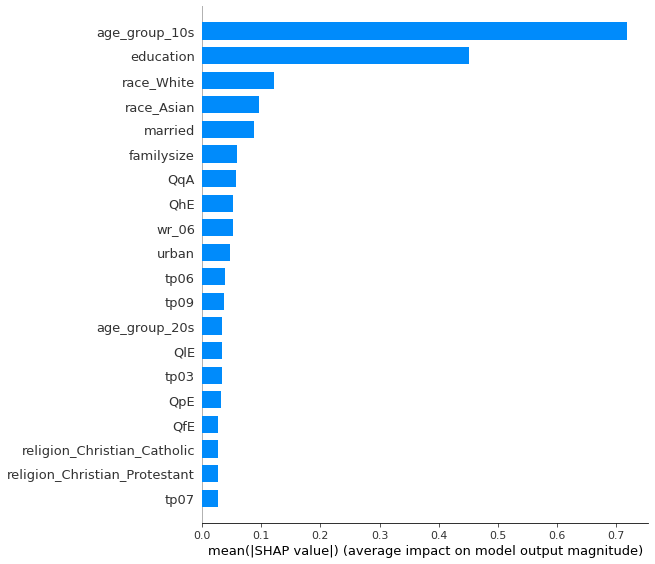

In [18]:
# Shpley Value 패키지

import shap

# Shpley Value 보기

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test)

shap.initjs()
shap.summary_plot(shap_values[1],test,plot_type = 'bar')

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, X_test) 
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test, plot_type = "bar")
 # 변수 간의 shap value 파악
shap.dependence_plot("Income", shap_values, X_test)

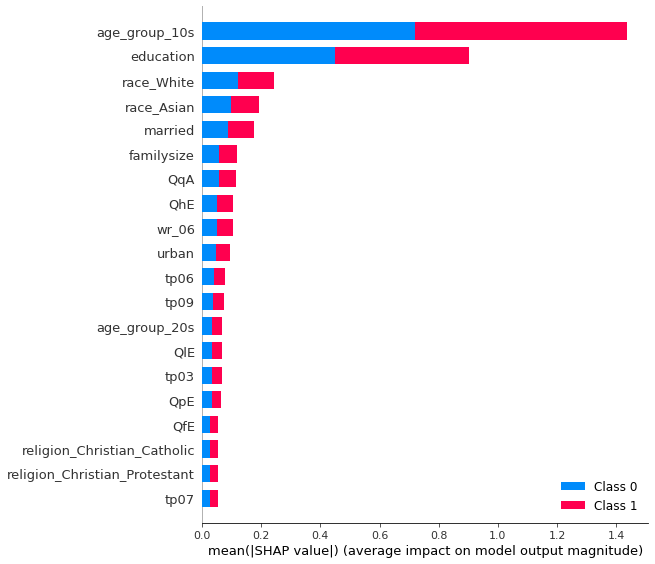

In [19]:
shap.summary_plot(shap_values, test)

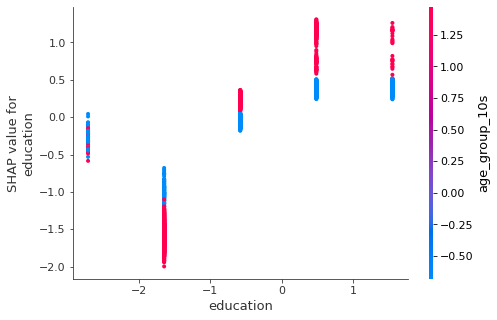

In [22]:
shap.dependence_plot("education", shap_values[0], test)

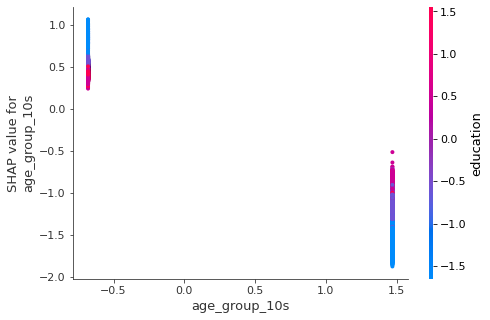

In [23]:
shap.dependence_plot("age_group_10s", shap_values[0], test)